<a href="https://colab.research.google.com/github/Sampath04x/PRODIGY_ML_03/blob/main/CATVDOG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle competitions download -c dogs-vs-cats

100% 809M/812M [00:03<00:00, 216MB/s]
100% 812M/812M [00:03<00:00, 252MB/s]


In [4]:

import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:

zip_ref=zipfile.ZipFile('/content/train.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:

zip_ref=zipfile.ZipFile('/content/test1.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [7]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten


In [8]:
!mkdir /content/train/dogs
!mkdir /content/train/cats
!mv /content/train/*dog* /content/train/dogs
!mv /content/train/*cat* /content/train/cats

mv: cannot move '/content/train/dogs' to a subdirectory of itself, '/content/train/dogs/dogs'
mv: cannot move '/content/train/cats' to a subdirectory of itself, '/content/train/cats/cats'


In [9]:
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)



Found 25000 files belonging to 2 classes.


In [10]:
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

train_ds=train_ds.map(process)

In [11]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
history=model.fit(train_ds,epochs=10)

Epoch 1/10
782/782 [==============================] - 75s 83ms/step - loss: 0.6485 - accuracy: 0.6053
Epoch 2/10
782/782 [==============================] - 62s 78ms/step - loss: 0.4794 - accuracy: 0.7665
Epoch 3/10
782/782 [==============================] - 61s 78ms/step - loss: 0.3683 - accuracy: 0.8358
Epoch 4/10
782/782 [==============================] - 59s 75ms/step - loss: 0.2436 - accuracy: 0.8974
Epoch 5/10
782/782 [==============================] - 57s 72ms/step - loss: 0.1452 - accuracy: 0.9429
Epoch 6/10
782/782 [==============================] - 56s 71ms/step - loss: 0.0774 - accuracy: 0.9725
Epoch 7/10
782/782 [==============================] - 59s 74ms/step - loss: 0.0595 - accuracy: 0.9791
Epoch 8/10
782/782 [==============================] - 56s 71ms/step - loss: 0.0463 - accuracy: 0.9857
Epoch 9/10
782/782 [==============================] - 57s 73ms/step - loss: 0.0329 - accuracy: 0.9883
Epoch 10/10
782/782 [==============================] - 58s 73ms/step - loss: 0.043

In [19]:
import cv2
import matplotlib.pyplot as plt
test_img=cv2.imread('/content/cat.jpg')
test_img=cv2.resize(test_img,(256,256))
test_input=test_img.reshape((1,256,256,3))

1/1 [==============================] - 0s 120ms/step
The image is predicted to be a cat.


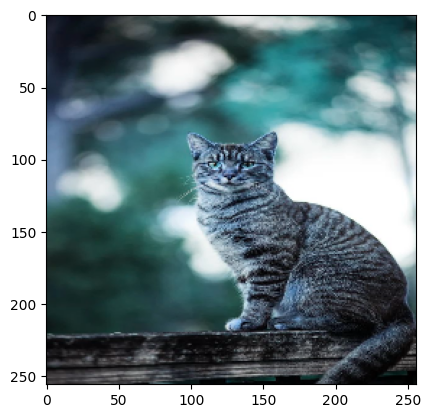

In [24]:
plt.imshow(test_img)
svm_predict= model.predict(test_input)

if svm_predict == 1:
        print('The image is predicted to be a dog.')
else:
        print('The image is predicted to be a cat.')

In [25]:
test_img=cv2.imread('/content/dog.jpg')
test_img=cv2.resize(test_img,(256,256))
test_input=test_img.reshape((1,256,256,3))

1/1 [==============================] - 0s 26ms/step
The image is predicted to be a dog.


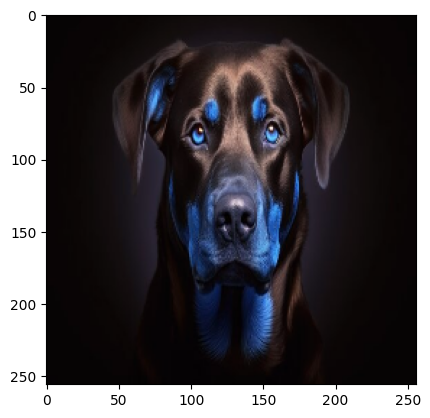

In [26]:
plt.imshow(test_img)
svm_predict= model.predict(test_input)

if svm_predict == 1:
        print('The image is predicted to be a dog.')
else:
        print('The image is predicted to be a cat.')